In [1]:
import pandas as pd
import statistics
import math
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import pylab as rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the Mean silence time with its delays and R
df_T = pd.read_csv("Mean_Silence_Time_gsyn0.001811.csv") # this dataframe contains the complete time series that we used to train the RF in the paper. It is possible to use the others time series as well
df = pd.read_csv("Mean_Silence_Time_gsyn0.001825.csv") # this dataframe contains the complete time series

Text(0, 0.5, '<T> (ms)')

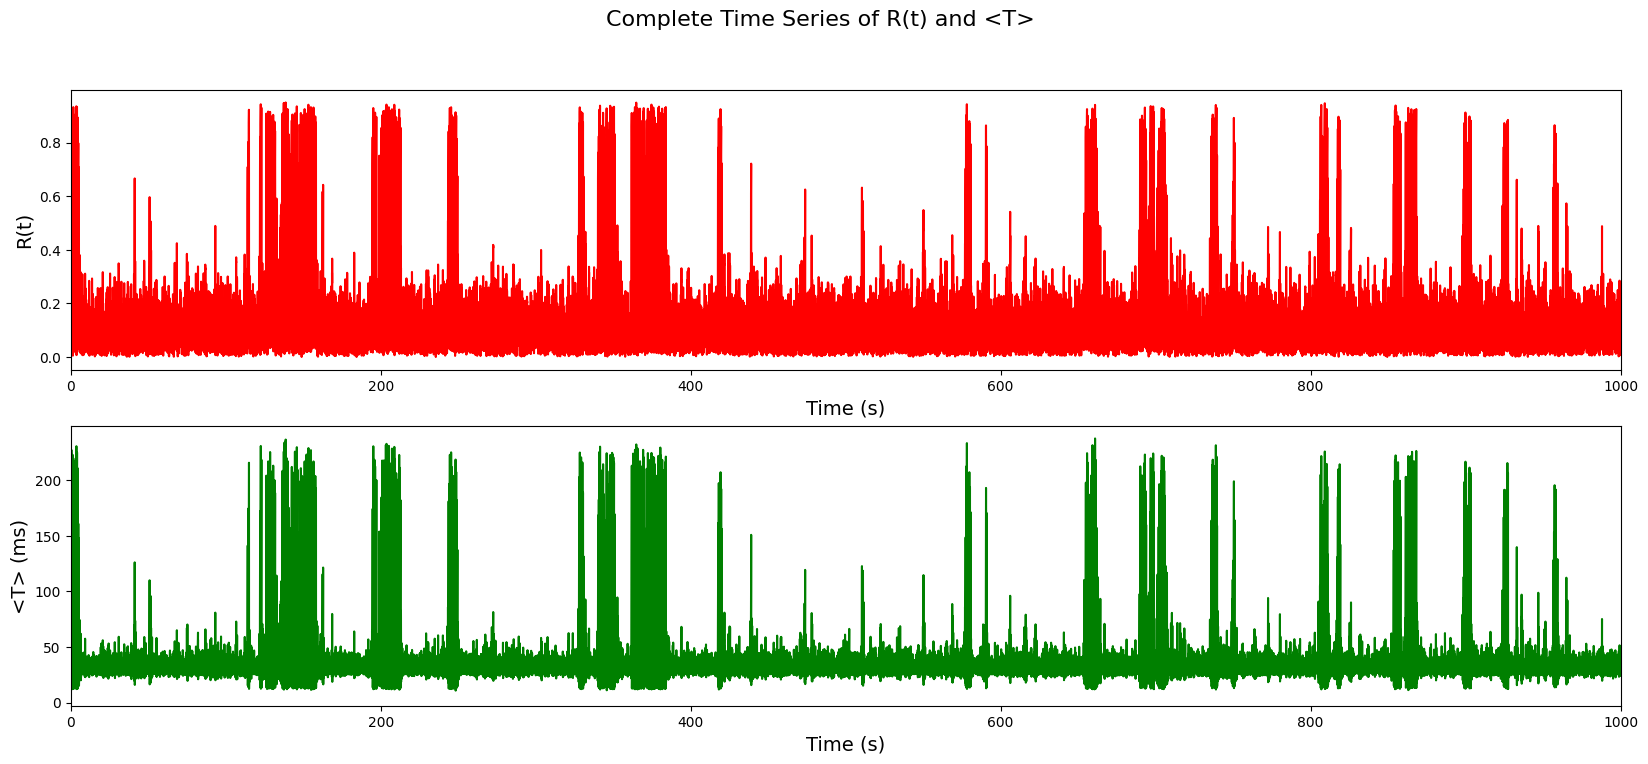

In [76]:
plt.figure(figsize=(20, 8))

plt.suptitle('Complete Time Series of R(t) and <T>', fontsize=16)

plt.subplot(2, 1, 1)
plt.plot(df['time']/1000, df['R'], label='R(t)', c='red')
plt.xlim(0,1000)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('R(t)', fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(df['time']/1000, df['T'], label='<T>', c='green')
plt.xlim(0,1000)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('<T> (ms)', fontsize=14)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

######### Here we are training the Random Forest model ##############

#y: target
#X: Characteristics

X= df_T.drop(['time'], axis=1)
X= X.drop(['R'], axis=1)
y = df_T['R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=18)

rf = RandomForestRegressor(criterion='absolute_error',n_estimators = 200, max_features = 0.2, max_depth = 30, bootstrap=True, random_state = 18).fit(X_train, y_train)
prediction_train = rf.predict(X_train)
prediction_test = rf.predict(X_test)


absolute_error = mean_absolute_error(y_test, prediction_test)
r = pearsonr(y_test, prediction_test)
r2 = r2_score(y_test, prediction_test)
print("Evaluation of the model on the test set:")
print("Absolute error = %.3f, PearsonR = %.3f, R2 = %.3f" % (np.mean(absolute_error), r[0], r2))


In [ ]:
#once the model is trained, we can use it to predict the whole time series. We can also do the prediction of different time series with different parameters
# to change the time series to try it out we have to change the dataframe df

df = pd.read_csv("Mean_Silence_Time_gsyn0.001825.csv")

X = df.drop(['time'], axis=1)
X = X.drop(['R'], axis=1)
y = df['R']

prediction = rf.predict(X)

absolute_error = mean_absolute_error(y, prediction)
r = pearsonr(y, prediction)
r2 = r2_score(y, prediction)

print("Using the complete time series:")
print("Absolute error = %.3f, PearsonR = %.3f, R2 = %.3f" % (np.mean(absolute_error), r[0], r2))

Using the complete time series:
Absolute error = 0.047, PearsonR = 0.937, R2 = 0.876


Text(0, 0.5, 'R_pred')

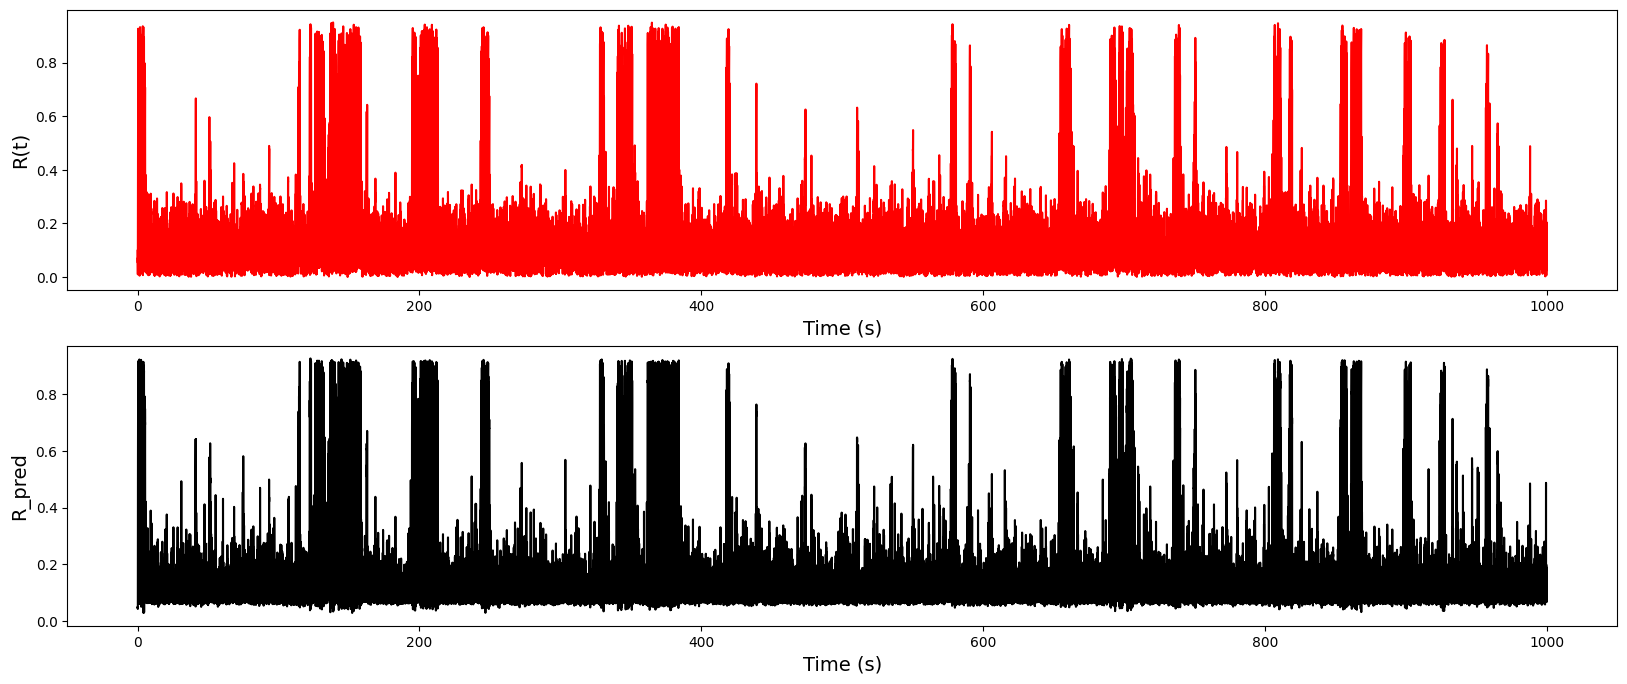

In [80]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot(df['time']/1000, df['R'], label='R(t)', c='red')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('R(t)', fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(df['time']/1000, prediction, label='R_pred', c='black')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('R_pred', fontsize=14)